In [59]:
from coders import BitStream, WavStream
from coders import SimpleASK as Coder
import scipy.io.wavfile

coder = Coder()

In [60]:
input_stream = BitStream(np.random.randint(2, size=20))
encoded = coder.encode(input_stream)
scipy.io.wavfile.write('test.wav', coder.rate.current, encoded)
read_rate, read = scipy.io.wavfile.read('test.wav')
noisy = np.random.normal(0, 1, len(read)) * 0.2 + read

Reshape: [ 0.73  0.2   0.2   0.47  1.    0.47  0.73  0.47  0.73  0.2 ]


In [61]:
wavstream = WavStream(noisy, read_rate, int(round(coder.rate.current * coder.symbol_duration.current)))
verification = input_stream.assymbolsize(2)
decoded = coder.decode(read_rate, wavstream)
check = verification == decoded

Main vars: 1000 10000 67 [ 0.2   0.47  0.73  1.  ]
Filter vars: 27 0.5 13
Peak vars: [13] 0.005
peak 0.82
peak 0.23
peak 0.21
peak 0.51
peak 1.11
peak 0.53
peak 0.81
peak 0.52
peak 0.78
peak 0.22


Length: 10000
Quality: 1.0


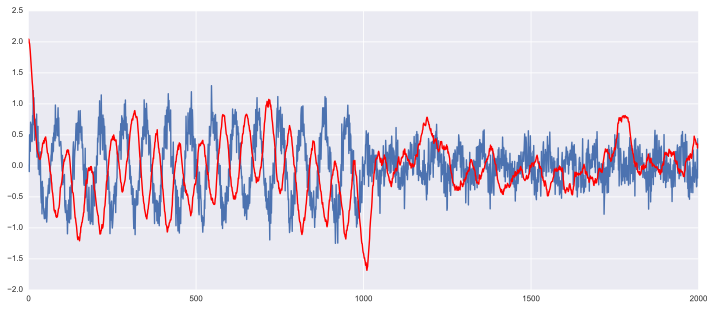

In [62]:
lim = (0, 2000)
sns.tsplot(wavstream[lim[0]:lim[1]])
sns.tsplot(wavstream.filter(80, 0.5, 50)[lim[0]:lim[1]], color='r')
print('Length:', len(wavstream))
print('Quality:', check.sum()/len(check))